**Dataset**: https://github.com/sca-programming-school/datasets/blob/main/marketing_data_with_missing_values.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **4) Data overview (in details)**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/sca-programming-school/datasets/refs/heads/main/marketing_data_with_missing_values.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2128 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               1997 non-null   object 
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2128 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **5) Data Cleaning**

In [ ]:
# Columns with missing values
df.columns[df.isna().any()]

Index(['Education', 'Income', 'Dt_Customer', 'NumWebVisitsMonth'], dtype='object')

There are four columns with missing values:
+ `Education` (category) => mode
+ `Income` (Category) => mode
+ `DT_Customer` (Category) => NaT
+ `NumWebVisitsMonth` (number) => mean

In [ ]:
def replace_missing_value(col_name, replace_type):
    if replace_type == "mean":
        df[col_name] = df[col_name].fillna(df[col_name].mean())
    elif replace_type == "mode":
        df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
    elif replace_type == "median":
        df[col_name] = df[col_name].fillna(df[col_name].median())
    return df[col_name]

### **Education column**

Replace missing values with median values

In [ ]:
df["Education"] = replace_missing_value("Education", "mode")
df["Education"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Education
Non-Null Count  Dtype 
--------------  ----- 
2240 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


### **Income column**

Replace missing values with median values

In [ ]:
df["Income"] = replace_missing_value("Income", "mode")
df["Income"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype 
--------------  ----- 
2240 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


### **Dt_Customer column**

+ Convert `.to_datetime()` errors
+ Using parameters like `errors='coerce'`, which converts invalid parsing to `NaT` (Not a Time), making it easier to clean data.

In [ ]:
# Convert column to datetime, replacing invalid values with NaT
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors='coerce')

# Remove rows where 'Dt_Customer' is NaT (optional)
df = df.dropna(subset=["Dt_Customer"])

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

<ipython-input-7-f0e1872615e6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors='coerce')


### **NumWebVisitMonth column**

Replace missing values with mean values

In [ ]:
df["NumWebVisitsMonth"] = replace_missing_value("NumWebVisitsMonth", "median")
df["NumWebVisitsMonth"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2128 entries, 0 to 2127
Series name: NumWebVisitsMonth
Non-Null Count  Dtype  
--------------  -----  
2128 non-null   float64
dtypes: float64(1)
memory usage: 16.8 KB


<ipython-input-4-235bd022e4ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df[col_name].fillna(df[col_name].median())
<ipython-input-8-8580d43d3a33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NumWebVisitsMonth"] = replace_missing_value("NumWebVisitsMonth", "median")


### **Final check**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2128 non-null   int64         
 1   Year_Birth           2128 non-null   int64         
 2   Education            2128 non-null   object        
 3   Marital_Status       2128 non-null   object        
 4   Income               2128 non-null   object        
 5   Kidhome              2128 non-null   int64         
 6   Teenhome             2128 non-null   int64         
 7   Dt_Customer          2128 non-null   datetime64[ns]
 8   Recency              2128 non-null   int64         
 9   MntWines             2128 non-null   int64         
 10  MntFruits            2128 non-null   int64         
 11  MntMeatProducts      2128 non-null   int64         
 12  MntFishProducts      2128 non-null   int64         
 13  MntSweetProducts     2128 non-nul

In [ ]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2128.000000,2128.00000,2128.000000,2128.000000,2128,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,...,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000
mean,5587.730733,1968.81485,0.442669,0.502820,2013-07-09 12:02:01.804511232,49.301692,303.119361,26.371711,168.867481,37.834586,...,2.672932,5.786184,5.382989,0.073308,0.074718,0.072368,0.064850,0.013628,0.148966,0.007989
min,0.000000,1893.00000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2844.500000,1959.00000,0.000000,0.000000,2013-01-16 00:00:00,25.000000,23.000000,1.000000,15.750000,3.000000,...,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5482.500000,1970.00000,0.000000,0.000000,2013-07-06 12:00:00,50.000000,173.000000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8395.500000,1978.00000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,502.000000,33.000000,238.250000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.00000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3233.295405,12.04183,0.537720,0.543363,NaN,28.896182,336.048626,39.681471,228.079421,54.903916,...,2.942352,3.251828,2.332178,0.260703,0.262998,0.259158,0.246318,0.115967,0.356139,0.089043


There are some outliers in the data, which may negatively impact the performance of our Machine Learning model. Therefore, they must be identified and carefully removed or handled to ensure better model accuracy and reliability.

**Save Cleaned data**

In [ ]:
df.to_csv("cleaned_marketing_campaign.csv", index=False)

## **Removing outliers**

Coding a function to automatically remove the outliers in each columns

In [ ]:
def remove_outliers(df, col_name, threshold=1.5):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    con1 = df[col_name] >= lower_bound
    con2 = df[col_name] <= upper_bound
    return df[con1 & con2]

Filter out numeric columns

In [ ]:
numeric_columns = list(df.select_dtypes(include=['number']).columns)
numeric_columns

['ID',
 'Year_Birth',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain']

Using for loop to iterate through numeric column and do the removing process

In [ ]:
for col in numeric_columns:
    df = remove_outliers(df, col)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 6 to 2125
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   788 non-null    int64         
 1   Year_Birth           788 non-null    int64         
 2   Education            788 non-null    object        
 3   Marital_Status       788 non-null    object        
 4   Income               788 non-null    object        
 5   Kidhome              788 non-null    int64         
 6   Teenhome             788 non-null    int64         
 7   Dt_Customer          788 non-null    datetime64[ns]
 8   Recency              788 non-null    int64         
 9   MntWines             788 non-null    int64         
 10  MntFruits            788 non-null    int64         
 11  MntMeatProducts      788 non-null    int64         
 12  MntFishProducts      788 non-null    int64         
 13  MntSweetProducts     788 non-null    in

# **6) EDA Process**

## **What caused the increase in the number of products purchased?**

Focus on products, such as:
+ Wines => `MntWines`
+ Fruits => `MntFruits`
+ Meat => `MntMeatProducts`
+ Fish => `MntFishProducts`
+ Sweet => `MntSweetProducts`
+ Gold => `MntGoldProds`

### **Create a correlation matrix**

I basically do this to understand the correlation between columns

In [ ]:
corr_matrix = df[numeric_columns].corr()
corr_matrix

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
ID,1.000000,0.017223,0.024473,-0.019466,-0.051512,-0.026966,-0.073115,-0.052918,-0.103967,-0.074528,...,-0.031931,-0.082652,0.046857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,0.017223,1.000000,0.169733,-0.570483,-0.004043,-0.305885,0.103642,-0.051512,0.142505,0.135008,...,-0.174845,-0.143923,0.143470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,0.024473,0.169733,1.000000,-0.063455,0.081489,-0.273132,-0.120682,-0.100409,-0.103435,-0.103260,...,-0.188142,-0.237492,0.144319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teenhome,-0.019466,-0.570483,-0.063455,1.000000,-0.043323,0.330213,-0.191557,0.017891,-0.227865,-0.219969,...,0.128770,0.194953,-0.209269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,-0.051512,-0.004043,0.081489,-0.043323,1.000000,-0.014420,0.080614,0.111661,0.039918,0.109854,...,0.102939,0.005055,0.030245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,-0.026966,-0.305885,-0.273132,0.330213,-0.014420,1.000000,0.045481,0.531837,0.021128,0.017533,...,0.562265,0.658561,0.010851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFruits,-0.073115,0.103642,-0.120682,-0.191557,0.080614,0.045481,1.000000,0.359588,0.477459,0.583519,...,0.265715,0.315495,0.036682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,-0.052918,-0.051512,-0.100409,0.017891,0.111661,0.531837,0.359588,1.000000,0.430368,0.340973,...,0.492936,0.594105,0.117996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFishProducts,-0.103967,0.142505,-0.103435,-0.227865,0.039918,0.021128,0.477459,0.430368,1.000000,0.464890,...,0.268459,0.284956,0.019533,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,-0.074528,0.135008,-0.103260,-0.219969,0.109854,0.017533,0.583519,0.340973,0.464890,1.000000,...,0.299636,0.282378,0.006639,NaN,NaN,NaN,NaN,NaN,NaN,NaN


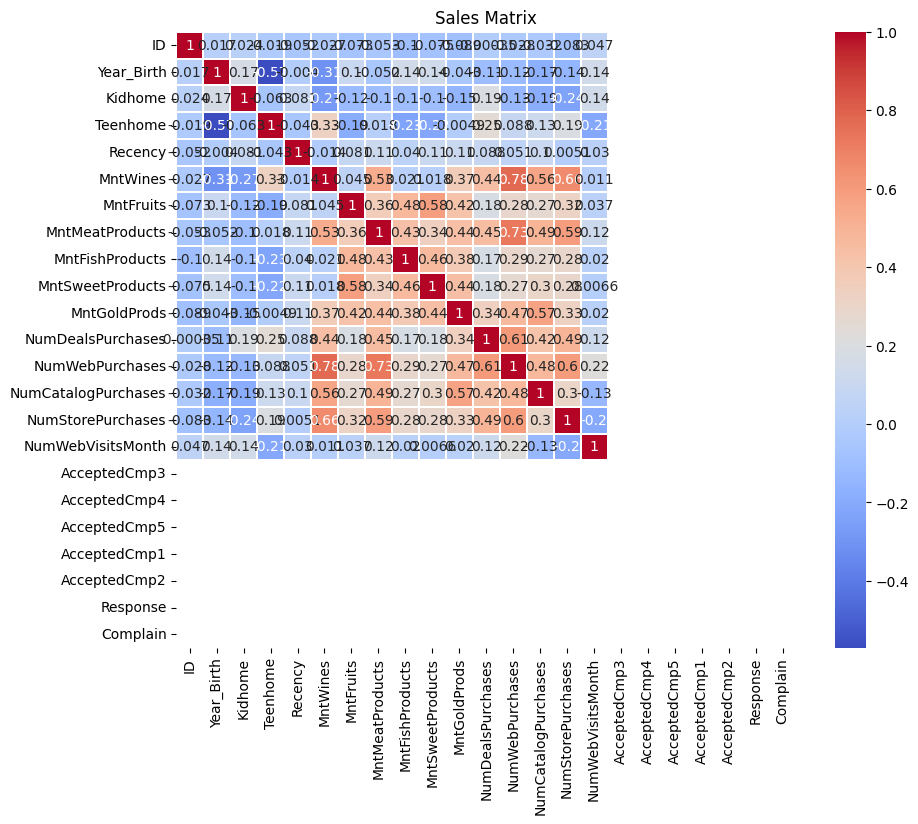

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title("Sales Matrix")
plt.show()

+ The matrix was quite complicated to follow through, therefore, we will try to break it down into part.
+ Be more specifically, we will focus on each products, to indicate which key factors affect the increase in the amount of product purchased

### **6.1) Wines**

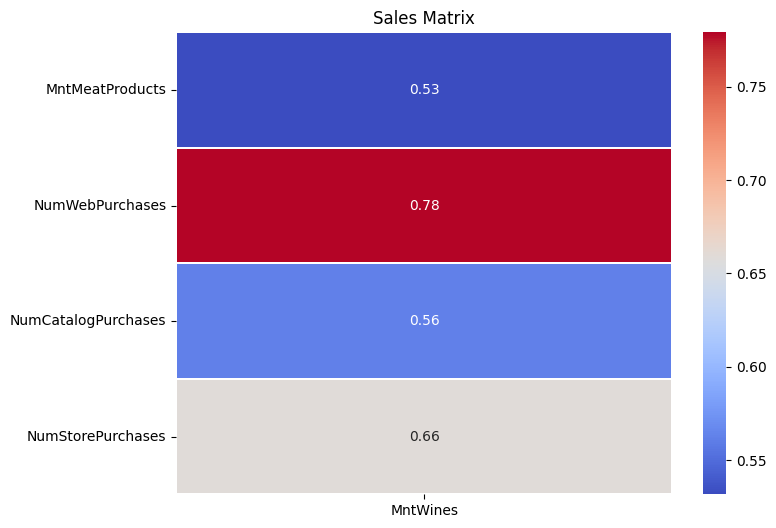

In [ ]:
corr_values = corr_matrix["MntWines"]  # Replace "Label" with your actual label column name

# Filter correlation values between 0.3 and 0.9 or between -0.3 and -0.9
filtered_corr = corr_values[((corr_values > 0.5) & (corr_values < 0.9)) | ((corr_values < -0.5) & (corr_values > -0.9))]

# Display columns with correlation in the specified range
# print(filtered_corr)
plt.figure(figsize=(8, 6))
filtered_corr_df = filtered_corr.to_frame()
sns.heatmap(filtered_corr_df, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title("Sales Matrix")
plt.show()

+ According to the stack, the increase of wine purchased could be explained by the increase in the number of web, store, and Catalog purchases.

### **6.2) Fruits**

In [ ]:
corr_values = corr_matrix["MntFruits"]  # Replace "Label" with your actual label column name

# Filter correlation values between 0.3 and 0.9 or between -0.3 and -0.9
filtered_corr = corr_values[((corr_values > 0.5) & (corr_values < 0.9)) | ((corr_values < -0.5) & (corr_values > -0.9))]

# Display columns with correlation in the specified range
print(filtered_corr)

MntSweetProducts    0.583519
Name: MntFruits, dtype: float64


+ There seem to be no key factors, which could explain the trend of the fruits purchase except the metric from sweet products

### **6.3) Meat**

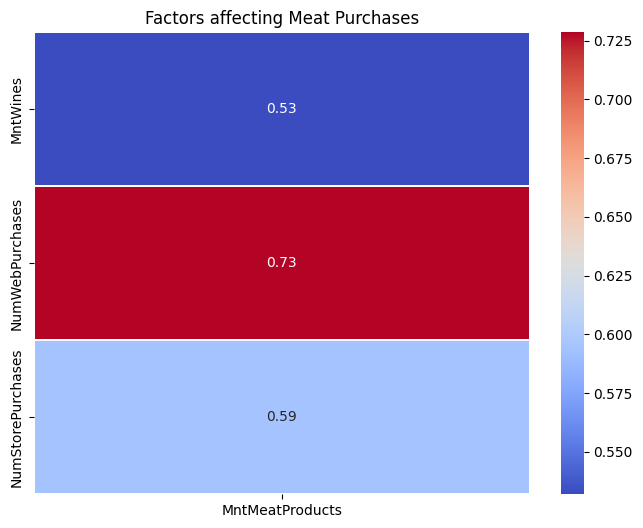

In [ ]:
corr_values = corr_matrix["MntMeatProducts"]  # Replace "Label" with your actual label column name

# Filter correlation values between 0.3 and 0.9 or between -0.3 and -0.9
filtered_corr = corr_values[((corr_values > 0.5) & (corr_values < 0.9)) | ((corr_values < -0.5) & (corr_values > -0.9))]

# Display columns with correlation in the specified range
# print(filtered_corr)
plt.figure(figsize=(8, 6))
filtered_corr_df = filtered_corr.to_frame()
sns.heatmap(filtered_corr_df, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title("Factors affecting Meat Purchases")
plt.show()

+ The factors correlating with the purchases of meat are quite similar to that of the wine except the missing of the number of Catalog purchases

### **6.4) Fish**

In [ ]:
corr_values = corr_matrix["MntFishProducts"]  # Replace "Label" with your actual label column name

# Filter correlation values between 0.3 and 0.9 or between -0.3 and -0.9
filtered_corr = corr_values[((corr_values > 0.5) & (corr_values < 0.9)) | ((corr_values < -0.5) & (corr_values > -0.9))]

# Display columns with correlation in the specified range
print(filtered_corr)
# plt.figure(figsize=(8, 6))
# filtered_corr_df = filtered_corr.to_frame()
# sns.heatmap(filtered_corr_df, annot=True, cmap='coolwarm', linewidths=0.2)
# plt.title("Sales Matrix")
# plt.show()

Series([], Name: MntFishProducts, dtype: float64)


No factors indicated

### **6.5) Sweet**

In [ ]:
corr_values = corr_matrix["MntSweetProducts"]  # Replace "Label" with your actual label column name

# Filter correlation values between 0.3 and 0.9 or between -0.3 and -0.9
filtered_corr = corr_values[((corr_values > 0.5) & (corr_values < 0.9)) | ((corr_values < -0.5) & (corr_values > -0.9))]

# Display columns with correlation in the specified range
print(filtered_corr)

MntFruits    0.583519
Name: MntSweetProducts, dtype: float64


### **6.6) Gold**

In [ ]:
corr_values = corr_matrix["MntGoldProds"]  # Replace "Label" with your actual label column name

# Filter correlation values between 0.3 and 0.9 or between -0.3 and -0.9
filtered_corr = corr_values[((corr_values > 0.5) & (corr_values < 0.9)) | ((corr_values < -0.5) & (corr_values > -0.9))]

# Display columns with correlation in the specified range
print(filtered_corr)

NumCatalogPurchases    0.568304
Name: MntGoldProds, dtype: float64


We have found something interesting here as we can probably infer that most gold were purchased through catalogue. As a result, this method should be consider if we want to increase the amount of gold purchases in the future.

## **Plotting histogram to observe the marital status distribution**

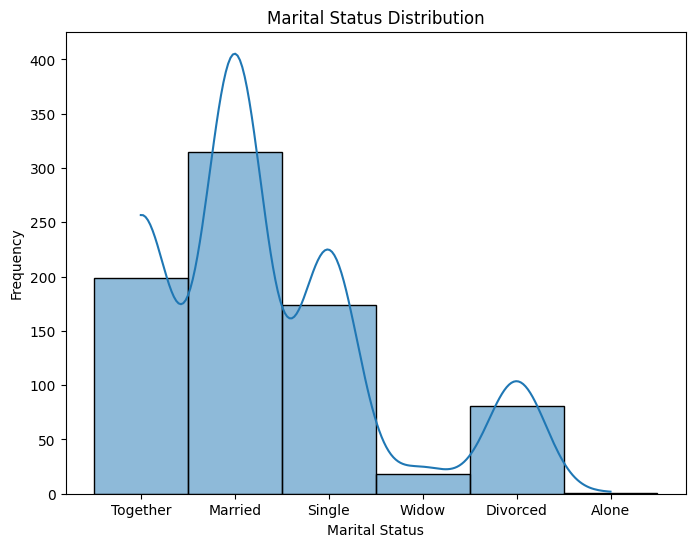

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Marital_Status"], kde=True)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

The majority of customers are either married or in a relationship

# **7) Visualization**

For further information, refer to the ReadME file at the `7) Visualization` section

# **8) Analysis**

## **Predict the Wines & Meat Purchases**

In this section, I utilized Machine Learning to formulate hypotheses regarding the purchase amount of wine and meat.

### **1) Wines**

In [ ]:
import statsmodels.api as sm

X_wine = df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]]
y_wine = df["MntWines"]

X_wine = sm.add_constant(X_wine)

model = sm.OLS(y_wine, X_wine).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     638.3
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          6.70e-210
Time:                        14:20:01   Log-Likelihood:                -3781.6
No. Observations:                 788   AIC:                             7571.
Df Residuals:                     784   BIC:                             7590.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -72.7952    

+ **R^2 = 71%**: the model can explain 71% of the variance in the dependent variable (`MntWines`) based on the independent variables (`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`)
+ **All p-value equal to 0**: all independent variables have a real effect on the dependent variable

In [ ]:
test_data_wine = pd.DataFrame({
    "NumWebPurchases": [10],
    "NumCatalogPurchases": [0],
    "NumStorePurchases": [0]
})

test_data_wine = sm.add_constant(test_data_wine, has_constant="add")

predicted_amount = model.predict(test_data_wine)

print(f"Predicted Wines Purchases: {predicted_amount[0]}")

Predicted Wines Purchases: 122.44076095476626


In [ ]:
test_data_wine = pd.DataFrame({
    "NumWebPurchases": [0],
    "NumCatalogPurchases": [10],
    "NumStorePurchases": [0]
})

test_data_wine = sm.add_constant(test_data_wine, has_constant="add")

predicted_amount = model.predict(test_data_wine)

print(f"Predicted Wines Purchases: {predicted_amount[0]}")

Predicted Wines Purchases: 146.83998188674454


In [ ]:
test_data_wine = pd.DataFrame({
    "NumWebPurchases": [0],
    "NumCatalogPurchases": [0],
    "NumStorePurchases": [10]
})

test_data_wine = sm.add_constant(test_data_wine, has_constant="add")

predicted_amount = model.predict(test_data_wine)

print(f"Predicted Wines Purchases: {predicted_amount[0]}")

Predicted Wines Purchases: 121.34690394696327


### **What could be concluded from the experiment?**

+ The increase in the number of catalog purchases has the most significant impact on the increase in wine purchases.
+ Furthermore, an increase in the number of catalog purchases is positively correlated with the amount of gold purchased.
=> As a result, this method should be strongly considered if the goal is to increase not only wine purchases but also gold purchases."

### **2) Meats**

In [ ]:
import statsmodels.api as sm

X_meat = df[["NumWebPurchases", "NumStorePurchases"]]
y_meat = df["MntMeatProducts"]

X_meat = sm.add_constant(X_meat)

model = sm.OLS(y_meat, X_meat).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        MntMeatProducts   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     518.4
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          3.07e-144
Time:                        14:20:01   Log-Likelihood:                -3270.8
No. Observations:                 788   AIC:                             6548.
Df Residuals:                     785   BIC:                             6562.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -22.2662      2.28

+ **R^2 = 57%**: the model can explain 57% of the variance in the dependent variable (`MntWines`) based on the independent variables (`NumWebPurchases`, `NumStorePurchases`)
+ **All p-value equal to 0**: all independent variables have a real effect on the dependent variable

In [ ]:
test_data_meat = pd.DataFrame({
    "NumWebPurchases": [10],
    "NumStorePurchases": [0]
})

test_data_meat = sm.add_constant(test_data_meat, has_constant="add")

predicted_amount = model.predict(test_data_meat)

print(f"Predicted Meats Purchases: {predicted_amount[0]}")

Predicted Meats Purchases: 78.0167545851721


In [ ]:
test_data_meat = pd.DataFrame({
    "NumWebPurchases": [0],
    "NumStorePurchases": [10]
})

test_data_meat = sm.add_constant(test_data_meat, has_constant="add")

predicted_amount = model.predict(test_data_meat)

print(f"Predicted Meats Purchases: {predicted_amount[0]}")

Predicted Meats Purchases: 47.02217688683694


### **What could be concluded from the experiment?**

+ Meat products tend to be more preferable for purchase via e-commerce channels.
+ This may be due to digital transformation, which has noticeably changed customers' shopping habits.
+ When purchasing products through online platforms, people tend to feel more comfortable adding more items to their baskets.
+ The delivery service then dispatches the goods to their homes.

# **9) Outcome**

Proceed back to file ReadME, in the `9) Outcomes` section